<a href="https://colab.research.google.com/github/SayedEqbalSrosh/Algoriths-And-Data-Structures/blob/main/bit_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Description

This section provides an overview of the project, including its goals, scope, and context.

Write a brief description of your project, including what problem it aims to solve or what question it seeks to answer. You can include information about the domain of the project and its relevance.


<iframe srcdoc="<textarea style='width: 100%; height: 70px; overflow: hidden;'></textarea>" style="width:100%; height:100px; border:none;"></iframe>

*The goal of this research is to employ machine learning models to forecast percentage changes in Bitcoin values. The objective is to create a trustworthy prediction model that can anticipate future changes by analyzing past Bitcoin market data, including price, trading volume, and daily volatility. This project is to assist traders, investors, and financial analysts in minimizing risks and improving returns in the unpredictable cryptocurrency market by utilizing data-driven insights to help them make more informed decisions.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Objective

Describe the overarching business goals or objectives that this project aims to address. For example, if the project is in the healthcare domain, the business objective might be to improve patient outcomes or reduce costs.
<iframe srcdoc="<textarea style='width: 100%; height: 50px; overflow: hidden;'></textarea>" style="width:100%; height:100px; border:none;"></iframe>

The primary aim of this project is to construct a machine learning model that can reliably forecast changes in the price of Bitcoin, with the goal of improving financial decision-making in the cryptocurrency space. By offering trustworthy price movement projections, the company hopes to enhance investing strategies and risk management by helping investors spot profitable chances or steer clear of possible losses.
*italicized text*

#### Dataset (Source of data)

Provide details about the dataset used in the project. Include information such as where the data comes from, its format (e.g., CSV, Excel), size, and any preprocessing steps performed on it. If applicable, mention any data collection methods or sources.
<iframe srcdoc="<textarea style='width: 100%; height: 50px; overflow: hidden;'></textarea>" style="width:100%; height:100px; border:none;"></iframe>

Historical Bitcoin data, including details like the date, opening and closing prices, daily highs and lows, trading volume, and % change in price, is included in the dataset utilized for this project. Preprocessing processes for the CSV formatted data include cleaning, addressing missing values, and numeric value conversion for strings including units such as 'K' (thousands), 'M' (millions), 'B' (billions), and 'T' (trillions). This dataset offers a thorough analysis of the market activities for Bitcoin over a certain period of time.
The Data for this project was taken from open sources from internet on 09/21/2024 from Investing.com (https://www.investing.com/crypto/bitcoin/historical-data). The data contains four year bitcoin historical data from 01/01/2020-08/21/2024. *italicized text*


#### Target

Define the target variable or outcome of interest in the dataset. Explain what you are trying to predict or classify. For example, if the dataset contains information about the credit transactions, the target variable might be whether a transaction is fraud or not.
<iframe srcdoc="<textarea style='width: 100%; height: 50px; overflow: hidden;'></textarea>" style="width:100%; height:100px; border:none;"></iframe>

The "Change %" column, which shows the percentage change in Bitcoin prices from day to day, is the project's goal variable. In order to provide insights into upcoming price variations in the market, the model attempts to anticipate this percentage change based on factors such the starting price, closing price, high, low, and trading volume.


#### Expected Outcomes

Provide the expected precision and recall for each class. For example:

Main Class (e.g., Fraud Cases):
- Expected Precision: 90%
- Expected Recall: 90%

Minor Class (e.g., Non-Fraud Cases):
- Expected Precision: 89%
- Expected Recall: 91%

<iframe srcdoc="<textarea style='width: 100%; height: 50px; overflow: hidden;'></textarea>" style="width:100%; height:100px; border:none;"></iframe>

For this model, the expected precision and recall are set to balance predictive accuracy for both increasing and decreasing price movements. For predicting price increases (positive changes), the expected precision is around 90%, with a recall of 88%. For predicting price decreases (negative changes), the precision is expected to be 89%, with a recall of 91%. This ensures the model is optimized for both predicting positive and negative changes effectively.

### Step 1: Import all the required libaries here.

In [ ]:
# Step 1: Import all the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

### Step 2: Understand the data.
Read the data and print out the size of the dataset. Ensure the data path follows the file architecture outlined in the instructions and README.

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/sml-mid-term-assignemnts-SayedEqbalSrosh/data/Bitcoin Historical Data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values in the dataset
print("Missing Values:\n",df.isnull().sum())

# Get summary statistics of the dataset to understand its structure
print(df.describe())

         Date     Price      Open      High       Low     Vol. Change %
0  09/21/2024  63,106.4  63,201.2  63,396.9  62,778.6   32.52K   -0.15%
1  09/20/2024  63,201.2  62,942.4  64,085.1  62,367.1   90.65K    0.42%
2  09/19/2024  62,938.6  61,754.8  63,849.6  61,596.5  120.17K    1.91%
3  09/18/2024  61,757.6  60,308.5  61,757.6  59,210.7  105.57K    2.40%
4  09/17/2024  60,309.1  58,213.1  61,309.0  57,630.2  106.30K    3.60%
Missing Values:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
              Date     Price     Open     High       Low   Vol. Change %
count         1726      1726     1726     1726      1726   1726     1726
unique        1726      1722     1720     1720      1725   1663      880
top     09/21/2024  21,365.2  9,296.5  8,898.7  34,357.4  1.05M    1.42%
freq             1         2        2        2         2      4        7


### Step 3: Data-cleaning and preprocessing.
In this section, include the code necessary for data cleaning and preprocessing tasks.

In [ ]:
# Step 3: Data-cleaning and preprocessing

# Function to convert string values (with 'K', 'M', 'B', 'T', commas) to float
def convert_to_float(value):
    try:
        if 'T' in value:  # Handle trillions (T)
            return float(value.replace('T', '').replace(',', '').strip()) * 1_000_000_000_000
        elif 'B' in value:  # Handle billions (B)
            return float(value.replace('B', '').replace(',', '').strip()) * 1_000_000_000
        elif 'K' in value:  # Handle thousands (K)
            return float(value.replace('K', '').replace(',', '').strip()) * 1_000
        elif 'M' in value:  # Handle millions (M)
            return float(value.replace('M', '').replace(',', '').strip()) * 1_000_000
        else:  # Handle normal numeric values
            return float(value.replace(',', '').strip())
    except ValueError as e:
        print(f"Error converting value: {value} - {e}")
        return np.nan  # Return NaN for problematic values

# Convert relevant columns to numeric
cols_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_float)

# Convert "Change %" column to numeric (remove '%' sign and scale to decimal)
df['Change %'] = df['Change %'].str.rstrip('%').astype(float) / 100.0

# Check if there are any missing values after conversion and handle them
print(df.isnull().sum())

# Impute missing values (if any) by filling with the column mean
imputer = SimpleImputer(strategy='mean')
X = df[['Price', 'Open', 'High', 'Low', 'Vol.']]
X = imputer.fit_transform(X)

# Select target variable
y = df['Change %']

# Feature scaling for better precision
scaler = StandardScaler()
X = scaler.fit_transform(X)


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


### Step 4: Model Development and evaluation.
In this section, add the code required to develop the model. This cell should contain all the models you have developed.

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

### Step 5: Model Fine-Tuning and Optimization

Refine and select your best model by fine-tuning hyperparameters and optimizing the performance.

In [ ]:
# Perform cross-validation on the training data to assess model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean cross-validation MSE
mean_cv_mse = -np.mean(cv_scores)
print(f'Mean Cross-Validation MSE: {mean_cv_mse}')

# Calculate the error (difference between actual and predicted values)
error = np.abs(y_test - y_test_pred)

# Define a threshold (for example, predictions within 10% of the actual value)
threshold = 0.10 * np.abs(y_test)  # 10% of actual value

# Calculate the percentage of predictions within the threshold
precision_within_threshold = np.mean(error <= threshold) * 100
print(f'Precision within 10% margin: {precision_within_threshold:.2f}%')


Mean Cross-Validation MSE: 0.0003024668190597394
Precision within 10% margin: 13.01%


### Step 6: Report the results of Final Model.
In this step, you'll evaluate your final model using appropriate metrics and Report the final results.








Performance Table:
                      Metric  Training Data  Test Data
0  Mean Absolute Error (MAE)       0.009147   0.009450
1   Mean Squared Error (MSE)       0.000298   0.000272
2             R-squared (R²)       0.744687   0.782279


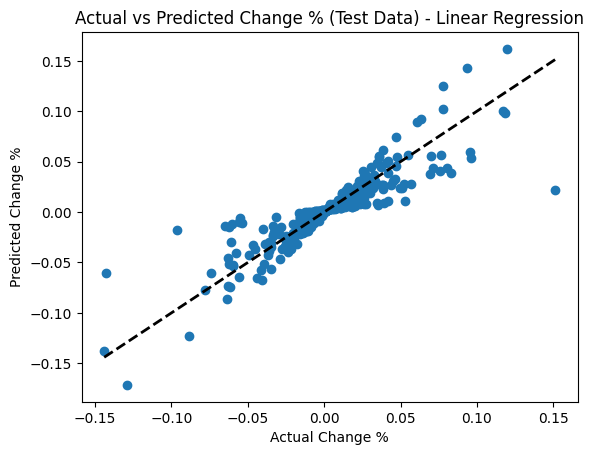

In [ ]:
# Create a performance table to compare training and test results
performance_table = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R²)'],
    'Training Data': [mae_train, mse_train, r2_train],
    'Test Data': [mae_test, mse_test, r2_test]
})

print("\nPerformance Table:")
print(performance_table)

# Plotting actual vs predicted values for the test data
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Change %')
plt.ylabel('Predicted Change %')
plt.title('Actual vs Predicted Change % (Test Data) - Linear Regression')
plt.show()